In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# Download this library if you dont have
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement sklearn (from versions: none)
ERROR: No matching distribution found for sklearn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, model_selection, metrics


In [4]:
#Set Seed to keep results consistant
np.random.seed(200)

# **Reading the CSV**

In [5]:
import pandas as pd

data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
data_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [6]:
# Display first few rows of the DataFrame
print(data.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [7]:
print(data.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [8]:
print(data.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [9]:
print(data.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


# Cleaning Data

In [10]:
# Impute missing values
data['Age'] = data['Age'].fillna(data['Age'].median())

data['HomePlanet'] = data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])

In [11]:
data.shape

(8693, 14)

In [12]:
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].median())

data_test['HomePlanet'] = data_test['HomePlanet'].fillna(data_test['HomePlanet'].mode()[0])

In [13]:
data_test.shape

(4277, 13)

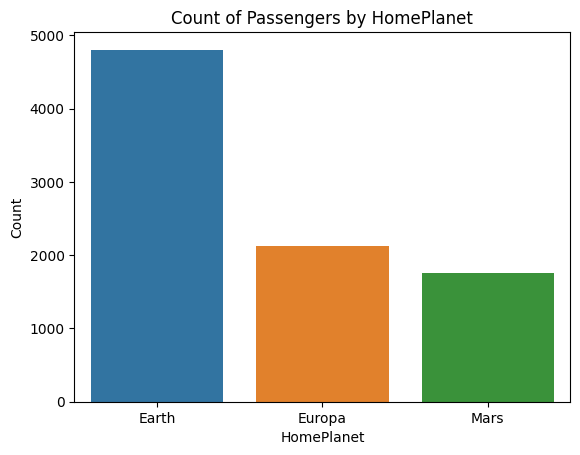

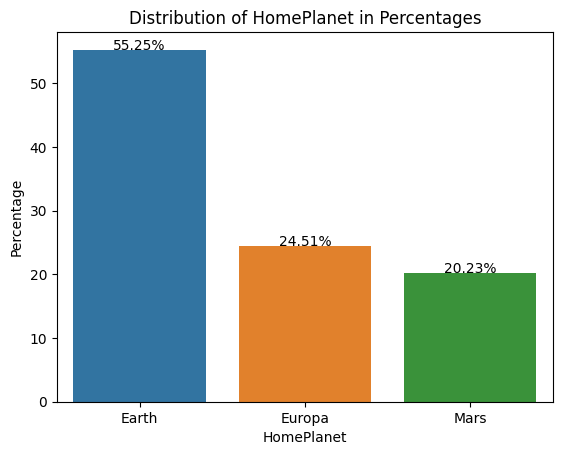

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_data = data.sort_values('HomePlanet')

sns.countplot(x='HomePlanet', data=sorted_data)

plt.title('Count of Passengers by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.show()

home_planet_counts = data['HomePlanet'].value_counts(normalize=True) * 100

sns.barplot(x=home_planet_counts.index, y=home_planet_counts.values)

for index, value in enumerate(home_planet_counts):
    plt.text(index, value, f'{value:.2f}%', ha='center')

plt.title('Distribution of HomePlanet in Percentages')
plt.ylabel('Percentage')
plt.xlabel('HomePlanet')
plt.show()

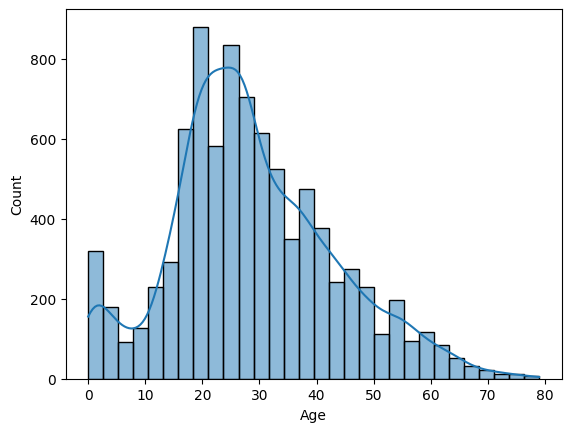

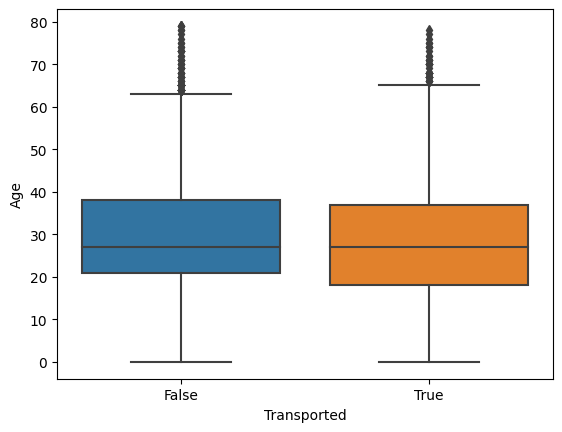

In [15]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.show()

sns.boxplot(x='Transported', y='Age', data=data)
plt.show()

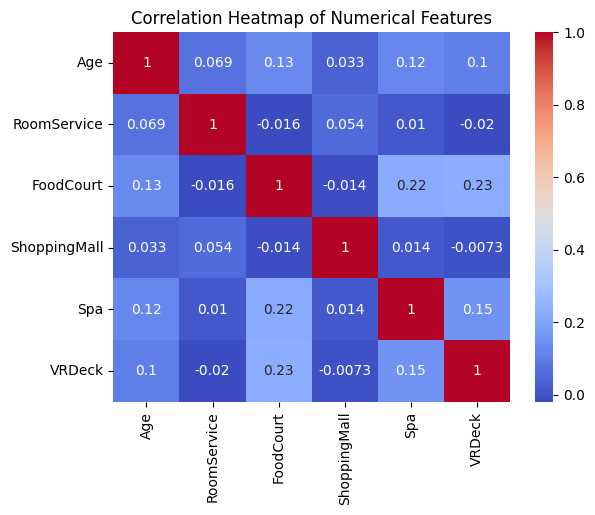

In [16]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [17]:
data.shape

(8693, 14)

# Removing Outliers

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


columns_to_check = ['Age']

# Removing outliers
for column in columns_to_check:
    data_cleaned = remove_outliers(data, column)

In [19]:
data_cleaned.shape

(8693, 14)

In [20]:
data_cleaned_2 = pd.DataFrame()

In [21]:
data_cleaned['total_spend'] = data_cleaned[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


columns_to_check = ['total_spend']

for column in columns_to_check:
    data_cleaned_2 = remove_outliers(data_cleaned, column)

In [22]:
data_cleaned_2.shape

(8069, 15)

In [23]:
data_test.shape

(4277, 13)

In [24]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


columns_to_check = ['Age']

# Removing outliers
for column in columns_to_check:
    data_test_cleaned = remove_outliers(data_test, column)

In [25]:
data_test_cleaned.shape

(4277, 13)

In [26]:
data_test_cleaned_2 = pd.DataFrame()

In [27]:
data_test_cleaned['total_spend'] = data_test_cleaned[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)


columns_to_check = ['total_spend']

for column in columns_to_check:
    data_test_cleaned_2 = remove_outliers(data_test_cleaned, column)

In [28]:
data_test_cleaned_2.shape

(3990, 14)

In [29]:
# Copy the data without outliers to a new DataFrame for model building
df_train = data_cleaned_2.copy()

print(df_train.head())
print(f"The shape of the modeling data is: {df_train.shape}")

  PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   

   RoomService  FoodCourt  ShoppingMall    Spa  VRDeck                Name  \
0          0.0        0.0           0.0    0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.0  549.0    44.0        Juanna Vines   
4        303.0       70.0         151.0  565.0     2.0   Willy Santantines   
5          0.0      483.0           0.0  291.0     0.0   Sandie Hinetthews   
6         42.0     1539.0           3.0    0.0     0.0  Billex Jacostaffey   

   Transported  total_spend  
0        False          0.0  
1         True        736.0  
4 

In [30]:
df_test = data_test_cleaned_2.copy()

print(df_test.head())
print(f"The shape of the modeling data is: {df_test.shape}")

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   
5     0027_01      Earth     False  F/7/P  TRAPPIST-1e  31.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Nelly Carsoning   
1          0.0        9.0           0.0  2823.0     0.0   Lerome Peckers   
2          0.0        0.0           0.0     0.0     0.0  Sabih Unhearfus   
4         10.0        0.0         635.0     0.0     0.0  Brence Harperez   
5          0.0     1615.0         263.0   113.0    60.0     Karlen Ricks   

   total_spend  
0          0.0  
1       2832.0  
2          0.0  
4        645.0  
5       2051.0  
The shape of t

# Running the Model

In [31]:
global_grid_results_df = pd.DataFrame()

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None



def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


# Usage example
df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')

model = RandomForestClassifier()
param_grid = {
    'model__n_estimators': [100, 200, 300],    
    'model__max_depth': [None, 10, 20, 30], 
    'model__min_samples_split': [2, 5, 10],  
    'model__min_samples_leaf': [1, 2, 4] 
}

best_clf, global_grid_results_df = train_model(X, y, model, param_grid, grid_search=True)
submission_RandomForestClassifier = make_predictions(best_clf, df_test)


Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score: 0.7911770151287826


In [33]:
submission_RandomForestClassifier

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,False
5,0027_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [34]:
global_grid_results_df.to_csv('submission_RandomForestClassifier_Final.csv', index=False)

In [35]:
global_grid_results_df = pd.DataFrame()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report





def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None


def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


# Usage example
df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')

# KNN Model
knn_model = KNeighborsClassifier()

# Define the parameter grid for KNN if you plan to use GridSearchCV
knn_param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

best_clf, grid_results = train_model(X, y, knn_model, knn_param_grid, grid_search=True)
submission_Knn = make_predictions(best_clf, df_test)

Best parameters: {'model__metric': 'euclidean', 'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best score: 0.7689934861653034


In [37]:
submission_Knn

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [38]:
grid_results

,params,mean_test_score,std_test_score,rank_test_score
4,"{'model__metric': 'euclidean', 'model__n_neigh...",0.768993,0.006100,1
10,"{'model__metric': 'manhattan', 'model__n_neigh...",0.764905,0.009938,2
2,"{'model__metric': 'euclidean', 'model__n_neigh...",0.761557,0.006759,3
8,"{'model__metric': 'manhattan', 'model__n_neigh...",0.757963,0.012148,4
5,"{'model__metric': 'euclidean', 'model__n_neigh...",0.756352,0.007658,5
11,"{'model__metric': 'manhattan', 'model__n_neigh...",0.754122,0.009137,6
3,"{'model__metric': 'euclidean', 'model__n_neigh...",0.750651,0.009851,7
9,"{'model__metric': 'manhattan', 'model__n_neigh...",0.746933,0.012000,8
0,"{'model__metric': 'euclidean', 'model__n_neigh...",0.739374,0.006124,9
6,"{'model__metric': 'manhattan', 'model__n_neigh...",0.739126,0.009064,10


In [39]:
grid_results.to_csv('submission_Knn_Final.csv', index=False)

In [40]:
grid_results = pd.DataFrame()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier




def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None


def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


# Usage example
df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')

# ADA Model
ada_model = AdaBoostClassifier()

# Define the parameter grid for KNN if you plan to use GridSearchCV
ada_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 1]
}


best_clf, grid_results = train_model(X, y, ada_model, ada_param_grid, grid_search=True)
submission_ada = make_predictions(best_clf, df_test)

Best parameters: {'model__learning_rate': 1, 'model__n_estimators': 100}
Best score: 0.7763054365436959


In [42]:
submission_ada

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [43]:
grid_results

,params,mean_test_score,std_test_score,rank_test_score
7,"{'model__learning_rate': 1, 'model__n_estimato...",0.776305,0.007268,1
8,"{'model__learning_rate': 1, 'model__n_estimato...",0.775810,0.008025,2
5,"{'model__learning_rate': 0.1, 'model__n_estima...",0.775190,0.007458,3
6,"{'model__learning_rate': 1, 'model__n_estimato...",0.774322,0.007992,4
4,"{'model__learning_rate': 0.1, 'model__n_estima...",0.769366,0.010093,5
3,"{'model__learning_rate': 0.1, 'model__n_estima...",0.750776,0.008372,6
2,"{'model__learning_rate': 0.01, 'model__n_estim...",0.737268,0.008527,7
1,"{'model__learning_rate': 0.01, 'model__n_estim...",0.723636,0.011092,8
0,"{'model__learning_rate': 0.01, 'model__n_estim...",0.720785,0.008833,9


In [44]:
grid_results.to_csv('submission_ada_Final.csv', index=False)

In [45]:
grid_results = pd.DataFrame()

In [46]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report


def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None


def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')

# Decision Tree Model
dt_model = DecisionTreeClassifier()

# Define the parameter grid for the Decision Tree
dt_param_grid = {
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}


best_clf, grid_search_results = train_model(X, y, dt_model, dt_param_grid, grid_search=True)
submission_dt = make_predictions(best_clf, df_test)


Best parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Best score: 0.7625484850091151


In [47]:
submission_dt

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [48]:
grid_search_results

,params,mean_test_score,std_test_score,rank_test_score
8,"{'model__max_depth': 10, 'model__min_samples_l...",0.762548,0.011289,1
2,"{'model__max_depth': 10, 'model__min_samples_l...",0.762548,0.011439,2
3,"{'model__max_depth': 10, 'model__min_samples_l...",0.762052,0.012725,3
0,"{'model__max_depth': 10, 'model__min_samples_l...",0.761804,0.014260,4
1,"{'model__max_depth': 10, 'model__min_samples_l...",0.761680,0.013688,5
4,"{'model__max_depth': 10, 'model__min_samples_l...",0.761185,0.011868,6
7,"{'model__max_depth': 10, 'model__min_samples_l...",0.760690,0.009582,7
5,"{'model__max_depth': 10, 'model__min_samples_l...",0.760689,0.010943,8
6,"{'model__max_depth': 10, 'model__min_samples_l...",0.760318,0.011198,9
26,"{'model__max_depth': 30, 'model__min_samples_l...",0.748420,0.007732,10


In [49]:
grid_search_results.to_csv('submission_dt_Final.csv', index=False)

In [50]:
grid_search_results = pd.DataFrame()

In [51]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report


def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None


def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')

# Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)

# Define the parameter grid for Logistic Regression
log_reg_param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Usage example
best_clf, grid_search_results = train_model(X, y, log_reg_model, log_reg_param_grid, grid_search=True)
submission_log_reg = make_predictions(best_clf, df_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters: {'model__C': 0.01, 'model__solver': 'newton-cg'}
Best score: 0.7792794142388632


In [52]:
submission_log_reg

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [53]:
grid_search_results

,params,mean_test_score,std_test_score,rank_test_score
0,"{'model__C': 0.01, 'model__solver': 'newton-cg'}",0.779279,0.007593,1
1,"{'model__C': 0.01, 'model__solver': 'lbfgs'}",0.779279,0.007593,1
3,"{'model__C': 0.01, 'model__solver': 'sag'}",0.779279,0.007593,1
4,"{'model__C': 0.01, 'model__solver': 'saga'}",0.779279,0.007593,1
2,"{'model__C': 0.01, 'model__solver': 'liblinear'}",0.779031,0.007468,5
5,"{'model__C': 0.1, 'model__solver': 'newton-cg'}",0.777917,0.007833,6
6,"{'model__C': 0.1, 'model__solver': 'lbfgs'}",0.777917,0.007833,6
8,"{'model__C': 0.1, 'model__solver': 'sag'}",0.777917,0.007833,6
9,"{'model__C': 0.1, 'model__solver': 'saga'}",0.777917,0.007833,6
7,"{'model__C': 0.1, 'model__solver': 'liblinear'}",0.777545,0.007576,10


In [54]:
grid_search_results.to_csv('submission_log_reg_Final.csv', index=False)

In [55]:
grid_search_results = pd.DataFrame()

In [56]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report


def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None


def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')

# SVM Model
svm_model = SVC()

# Define the parameter grid for SVM
svm_param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto']
}

best_clf, grid_search_results = train_model(X, y, svm_model, svm_param_grid, grid_search=True)
submission_svm = make_predictions(best_clf, df_test)

Best parameters: {'model__C': 10, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Best score: 0.7904333670586953


In [57]:
submission_svm

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [58]:
grid_search_results

,params,mean_test_score,std_test_score,rank_test_score
16,"{'model__C': 10, 'model__gamma': 'auto', 'mode...",0.790433,0.010804,1
7,"{'model__C': 1, 'model__gamma': 'scale', 'mode...",0.789565,0.009333,2
10,"{'model__C': 1, 'model__gamma': 'auto', 'model...",0.788698,0.008658,3
13,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.786468,0.015246,4
8,"{'model__C': 1, 'model__gamma': 'scale', 'mode...",0.785352,0.012417,5
17,"{'model__C': 10, 'model__gamma': 'auto', 'mode...",0.785352,0.011384,5
2,"{'model__C': 0.1, 'model__gamma': 'scale', 'mo...",0.784980,0.007618,7
14,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.784733,0.013567,8
1,"{'model__C': 0.1, 'model__gamma': 'scale', 'mo...",0.784237,0.008109,9
11,"{'model__C': 1, 'model__gamma': 'auto', 'model...",0.783493,0.009138,10


In [59]:
grid_search_results.to_csv('submission_svm_final.csv', index=False)

In [60]:
grid_search_results = pd.DataFrame()

In [61]:
from sklearn.linear_model import RidgeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report


def preprocess_data(df):
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)
    return df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)


def get_feature_transformers():
    categorical_features = ['HomePlanet', 'Destination', 'CabinDeck', 'CabinSide']
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    binary_features = ['CryoSleep', 'VIP']
    binary_transformer = OneHotEncoder(drop='if_binary')

    numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('bin', binary_transformer, binary_features)
        ])
    
    return preprocessor


def train_model(X, y, model, param_grid=None, grid_search=False):
    clf = Pipeline(steps=[('preprocessor', get_feature_transformers()),
                          ('model', model)])

    if grid_search and param_grid is not None:
        grid_clf = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
        grid_clf.fit(X, y)
        print("Best parameters:", grid_clf.best_params_)
        print("Best score:", grid_clf.best_score_)

        grid_search_results = pd.DataFrame(grid_clf.cv_results_)
        relevant_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
        grid_search_results = grid_search_results[relevant_columns]
        grid_search_results = grid_search_results.sort_values('rank_test_score')

        return grid_clf.best_estimator_, grid_search_results
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred))
        return clf, None


def make_predictions(clf, df_test):
    X_test = preprocess_data(df_test)
    predicted_transported = clf.predict(X_test)
    return pd.DataFrame({
        'PassengerId': df_test['PassengerId'],
        'Transported': predicted_transported.astype(bool)
    })


df_train_processed = preprocess_data(df_train)
X = df_train_processed.drop(['Transported'], axis=1)
y = df_train['Transported'].astype('int')


# Ridge Regression Model
ridge_model = RidgeClassifier()

# Define the parameter grid for Ridge Regression
ridge_param_grid = {
    'model__alpha': [0.1, 1, 10, 100, 1000]
}


best_clf, grid_search_results = train_model(X, y, ridge_model, ridge_param_grid, grid_search=True)
submission_ridge = make_predictions(best_clf, df_test)

Best parameters: {'model__alpha': 1000}
Best score: 0.7759334588623568


In [62]:
submission_ridge

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
4,0023_01,True
5,0027_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [63]:
grid_search_results

,params,mean_test_score,std_test_score,rank_test_score
4,{'model__alpha': 1000},0.775933,0.005996,1
3,{'model__alpha': 100},0.774199,0.009609,2
2,{'model__alpha': 10},0.773827,0.009617,3
1,{'model__alpha': 1},0.773827,0.009450,4
0,{'model__alpha': 0.1},0.773703,0.009396,5


In [64]:
grid_search_results.to_csv('submission_ridge_final.csv', index=False)

In [65]:
grid_search_results = pd.DataFrame()

In [66]:
import pandas as pd

data = {
    "Model": ["RandomForestClassifier", "KNeighborsClassifier", "AdaBoostClassifier",
              "DecisionTreeClassifier", "LogisticRegression", "svm_model", "RidgeClassifier"],
    "Best Parameters": [
        {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200},
        {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'},
        {'learning_rate': 1, 'n_estimators': 100},
        {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10},
        {'C': 0.01, 'solver': 'newton-cg'},
        {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'},
        {'alpha': 1000}
    ],
    "Best Score": [0.7912, 0.7690, 0.7763, 0.7625, 0.7793, 0.7904, 0.7759]
}

df = pd.DataFrame(data)


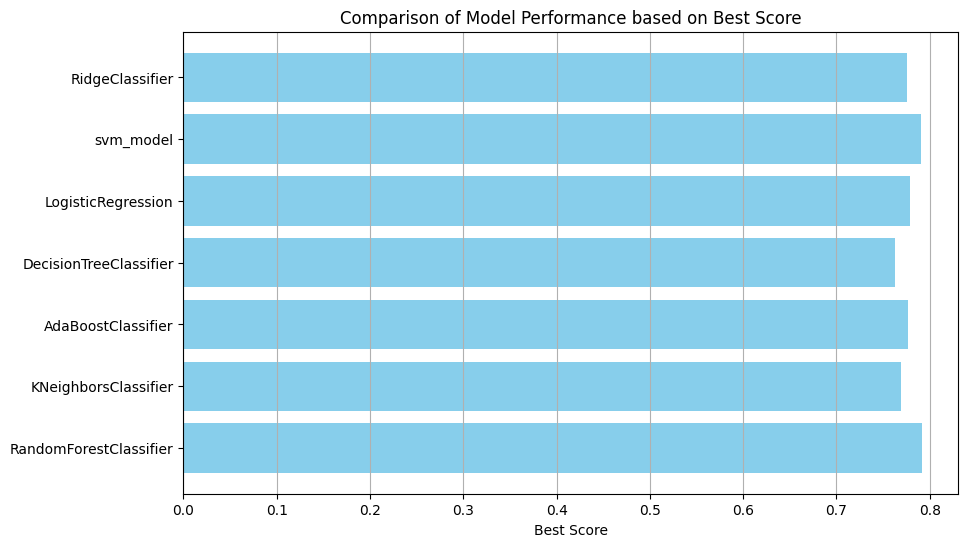

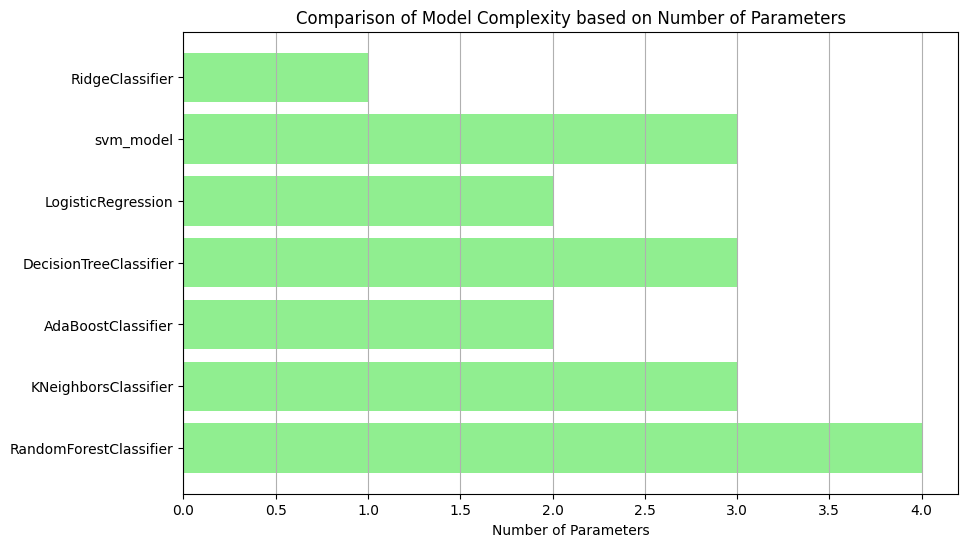

In [67]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Best Score'], color='skyblue')
plt.xlabel('Best Score')
plt.title('Comparison of Model Performance based on Best Score')
plt.grid(axis='x')


df['Parameter Count'] = df['Best Parameters'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
plt.barh(df['Model'], df['Parameter Count'], color='lightgreen')
plt.xlabel('Number of Parameters')
plt.title('Comparison of Model Complexity based on Number of Parameters')
plt.grid(axis='x')

# Displaying the plots
plt.show()

# **Neural Networks**

In [71]:
# # Using Neural Networks to train and predict
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l2

# # Assuming df_train and df_test are loaded here

# # Check for NaN values and fill them if necessary
# df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].mean())
# df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

# # For categorical columns, fill NaN with a placeholder or most frequent value
# df_train['HomePlanet'].fillna('Unknown', inplace=True)
# df_test['HomePlanet'].fillna('Unknown', inplace=True)  # Do the same for the test set

# # Convert boolean columns to int
# bool_cols = df_train.select_dtypes(include=['bool']).columns
# df_train[bool_cols] = df_train[bool_cols].astype(int)
# df_test[bool_cols] = df_test[bool_cols].astype(int)


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_cols),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
#     ])

# # Preprocess the data
# X_train = preprocessor.fit_transform(df_train[numerical_cols + categorical_cols])
# X_test = preprocessor.transform(df_test[numerical_cols + categorical_cols])

# # Prepare the target variable
# y_train = df_train['Transported'].astype(int).values

# # Neural Network Architecture
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
#     Dropout(0.5),
#     Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # Early Stopping Callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# # Compile the model with a lower learning rate
# optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model with validation split and early stopping
# model.fit(X_train, y_train, epochs=20, batch_size=64, callbacks=[early_stopping])

# # Predict and format for submission
# predictions = model.predict(X_test)
# predictions = (predictions > 0.5).astype(int)

# # Prepare submission DataFrame
# submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': predictions.flatten()})
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Assuming df_train and df_test are loaded here

# Define the column names for numerical and categorical data
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

# Check for NaN values and fill them if necessary
df_train[numerical_cols] = df_train[numerical_cols].fillna(df_train[numerical_cols].mean())
df_test[numerical_cols] = df_test[numerical_cols].fillna(df_test[numerical_cols].mean())

# For categorical columns, fill NaN with a placeholder or most frequent value
for col in categorical_cols:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    df_test[col].fillna(df_test[col].mode()[0], inplace=True)

# Convert boolean columns to int
bool_cols = df_train.select_dtypes(include=['bool']).columns
df_train[bool_cols] = df_train[bool_cols].astype(int)
df_test[bool_cols] = df_test[bool_cols].astype(int)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Preprocess the data
X = preprocessor.fit_transform(df_train[numerical_cols + categorical_cols])
y = df_train['Transported'].astype(int).values

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predict on test set
X_test = preprocessor.transform(df_test[numerical_cols + categorical_cols])
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Prepare submission DataFrame
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': predictions.flatten()})


Epoch 1/20
101/101 [==============================] - 2s 9ms/step - loss: 0.6309 - accuracy: 0.7216 - val_loss: 0.5026 - val_accuracy: 0.7739
Epoch 2/20
101/101 [==============================] - 1s 7ms/step - loss: 0.5224 - accuracy: 0.7774 - val_loss: 0.4855 - val_accuracy: 0.7794
Epoch 3/20
101/101 [==============================] - 1s 7ms/step - loss: 0.5063 - accuracy: 0.7833 - val_loss: 0.4820 - val_accuracy: 0.7881
Epoch 4/20
101/101 [==============================] - 1s 7ms/step - loss: 0.4845 - accuracy: 0.8031 - val_loss: 0.4826 - val_accuracy: 0.7962
Epoch 5/20
101/101 [==============================] - 1s 7ms/step - loss: 0.4773 - accuracy: 0.8122 - val_loss: 0.4863 - val_accuracy: 0.7924
Epoch 6/20
101/101 [==============================] - 1s 9ms/step - loss: 0.4672 - accuracy: 0.8263 - val_loss: 0.4955 - val_accuracy: 0.7974
Epoch 7/20
101/101 [==============================] - 1s 6ms/step - loss: 0.4514 - accuracy: 0.8389 - val_loss: 0.5002 - val_accuracy: 0.7943
Epoch 

In [72]:
submission

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
4,0023_01,0
5,0027_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [ ]:
# Result Compilation

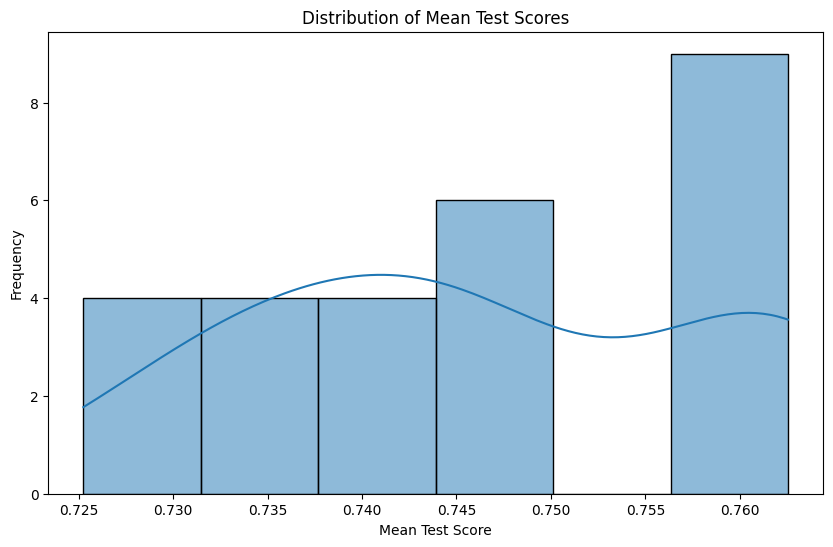

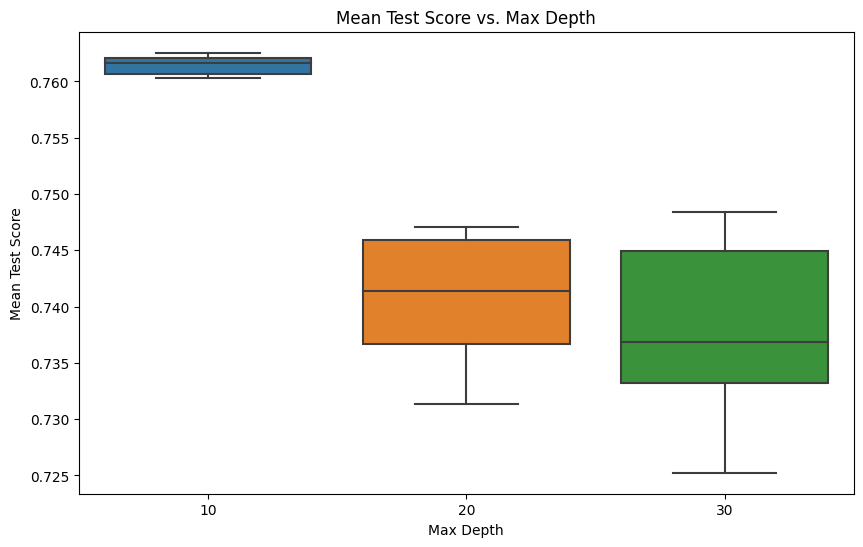

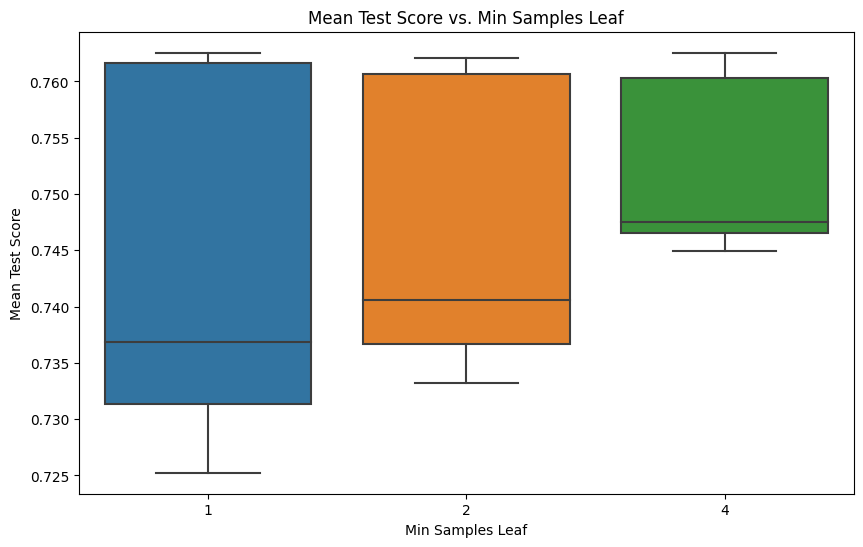

In [73]:
# Decision Tree

import matplotlib.pyplot as plt
import seaborn as sns
import ast
import pandas as pd


file_path = '/kaggle/working/submission_dt_Final.csv'
data = pd.read_csv(file_path)

data['params'] = data['params'].apply(ast.literal_eval)

data = pd.concat([data.drop(['params'], axis=1), data['params'].apply(pd.Series)], axis=1)

data.rename(columns=lambda x: x.replace('model__', ''), inplace=True)


plt.figure(figsize=(10, 6))
sns.histplot(data['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='max_depth', y='mean_test_score', data=data)
plt.title('Mean Test Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='min_samples_leaf', y='mean_test_score', data=data)
plt.title('Mean Test Score vs. Min Samples Leaf')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')
plt.show()

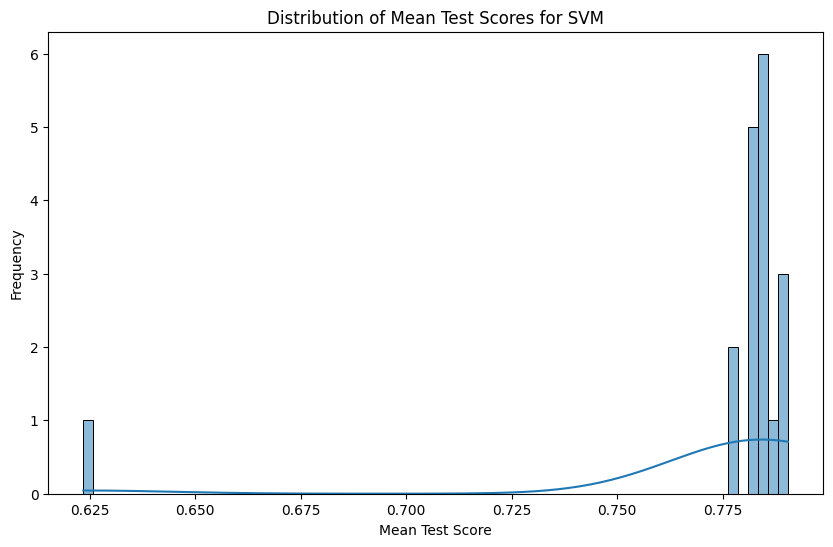

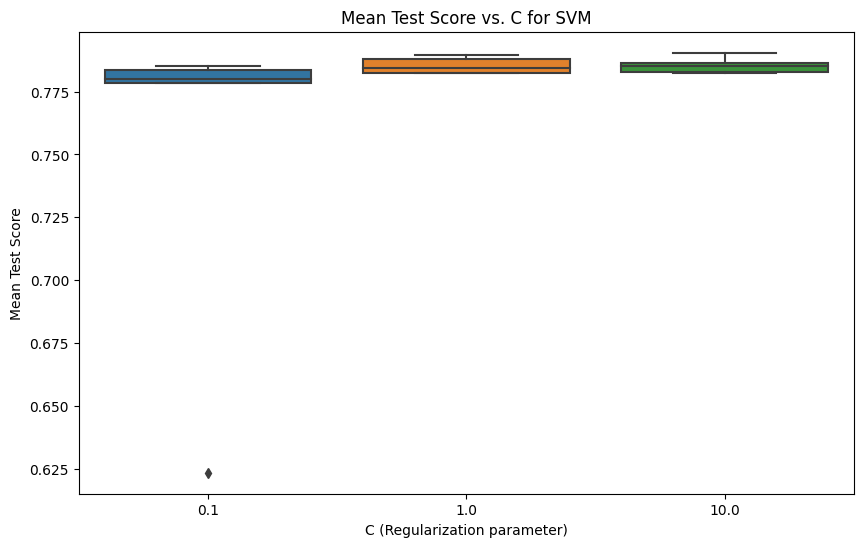

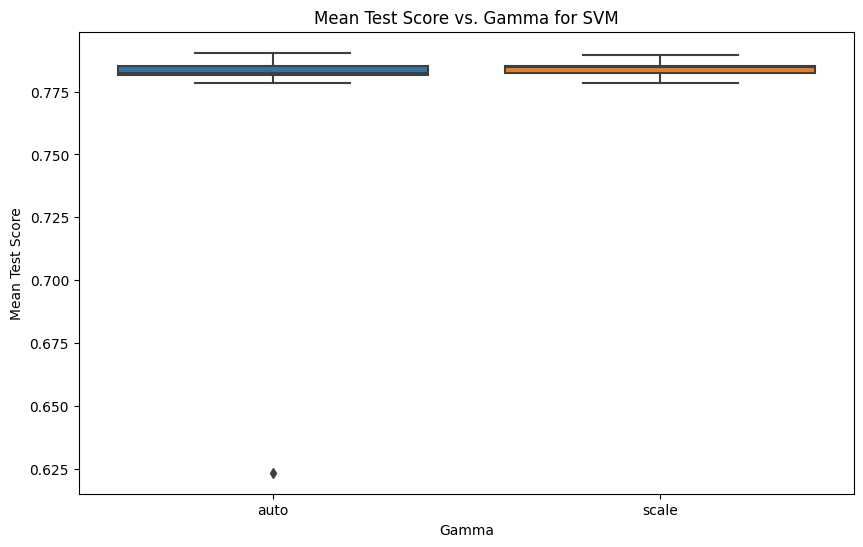

In [74]:
# SVM

file_path = '/kaggle/working/submission_svm_final.csv'
data = pd.read_csv(file_path)

data['params'] = data['params'].apply(ast.literal_eval)

data = pd.concat([data.drop(['params'], axis=1), data['params'].apply(pd.Series)], axis=1)

data.rename(columns=lambda x: x.replace('model__', ''), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores for SVM')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='C', y='mean_test_score', data=data)
plt.title('Mean Test Score vs. C for SVM')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='gamma', y='mean_test_score', data=data)
plt.title('Mean Test Score vs. Gamma for SVM')
plt.xlabel('Gamma')
plt.ylabel('Mean Test Score')
plt.show()

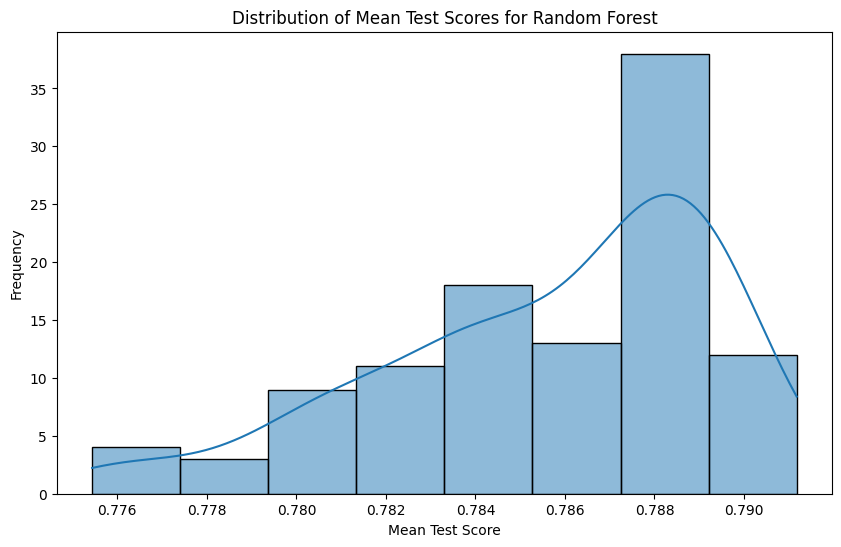

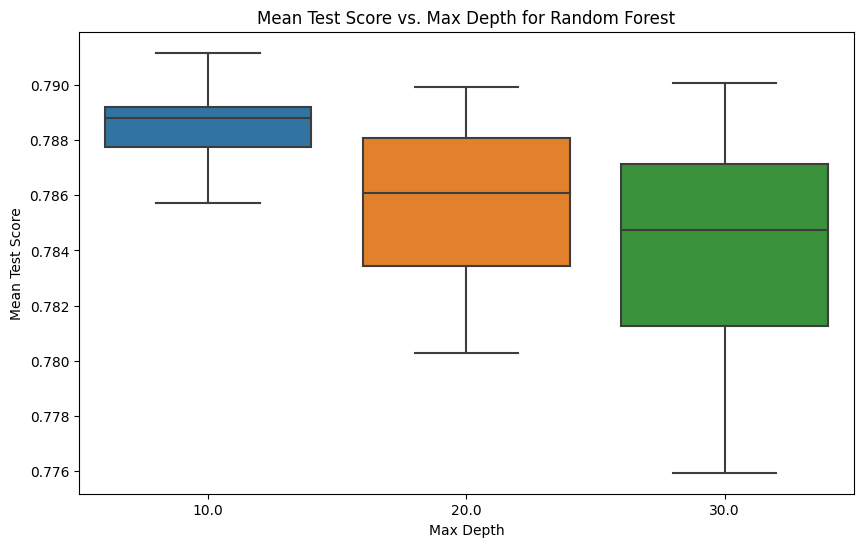

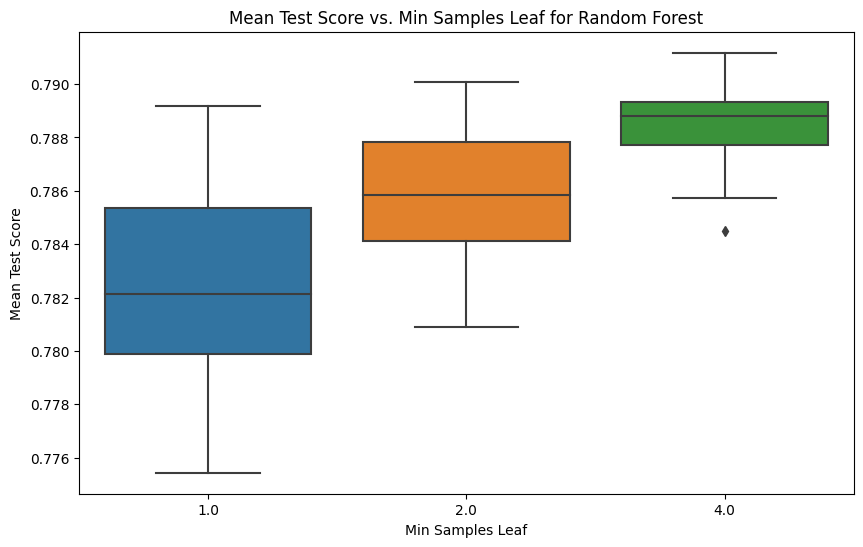

In [75]:
# Random Forest 

file_path = '/kaggle/working/submission_RandomForestClassifier_Final.csv'
data_rf = pd.read_csv(file_path)
data_rf['params'] = data_rf['params'].apply(ast.literal_eval)

data_rf = pd.concat([data_rf.drop(['params'], axis=1), data_rf['params'].apply(pd.Series)], axis=1)

data_rf.rename(columns=lambda x: x.replace('model__', ''), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data_rf['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores for Random Forest')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='max_depth', y='mean_test_score', data=data_rf)
plt.title('Mean Test Score vs. Max Depth for Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='min_samples_leaf', y='mean_test_score', data=data_rf)
plt.title('Mean Test Score vs. Min Samples Leaf for Random Forest')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Test Score')
plt.show()


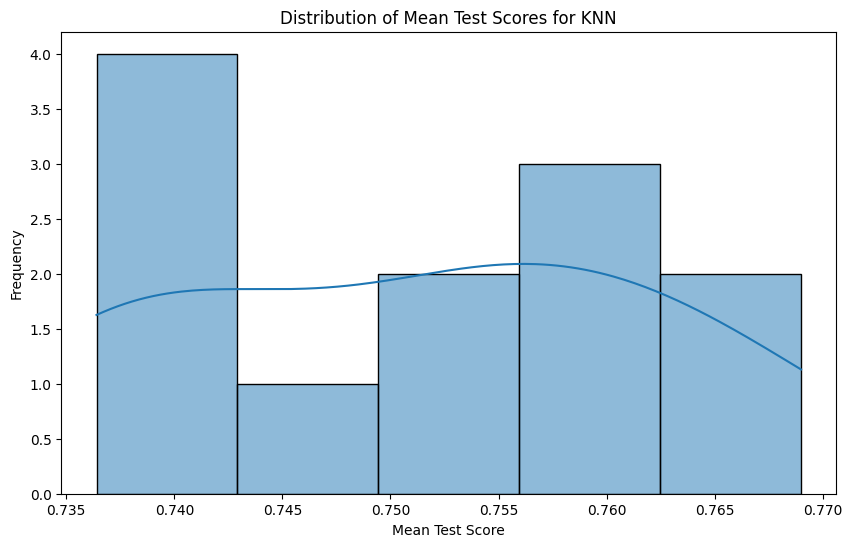

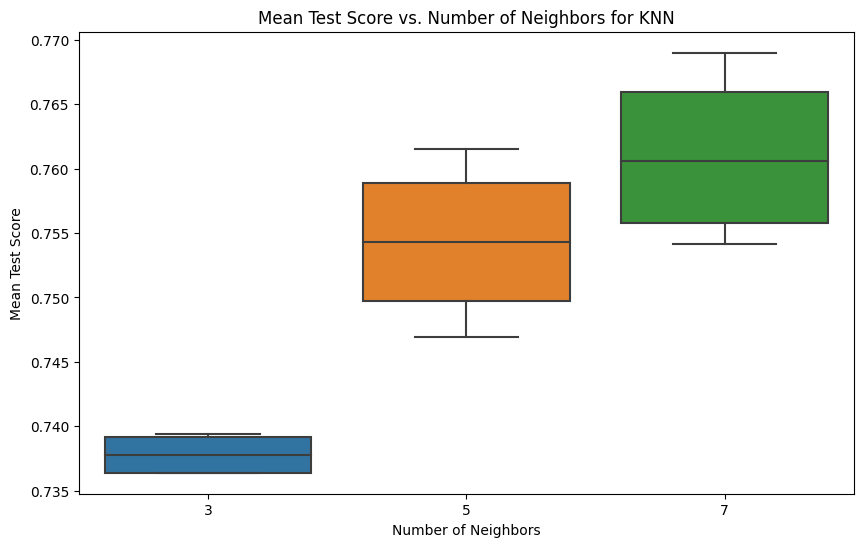

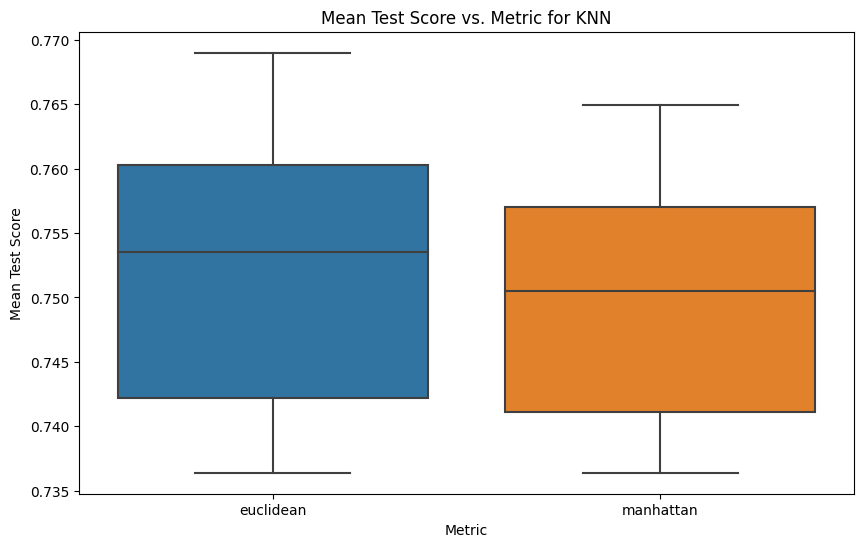

In [76]:
#KNN


file_path = '/kaggle/working/submission_Knn_Final.csv'
data_knn = pd.read_csv(file_path)

data_knn['params'] = data_knn['params'].apply(ast.literal_eval)

data_knn = pd.concat([data_knn.drop(['params'], axis=1), data_knn['params'].apply(pd.Series)], axis=1)

data_knn.rename(columns=lambda x: x.replace('model__', ''), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data_knn['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores for KNN')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='n_neighbors', y='mean_test_score', data=data_knn)
plt.title('Mean Test Score vs. Number of Neighbors for KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='metric', y='mean_test_score', data=data_knn)
plt.title('Mean Test Score vs. Metric for KNN')
plt.xlabel('Metric')
plt.ylabel('Mean Test Score')
plt.show()


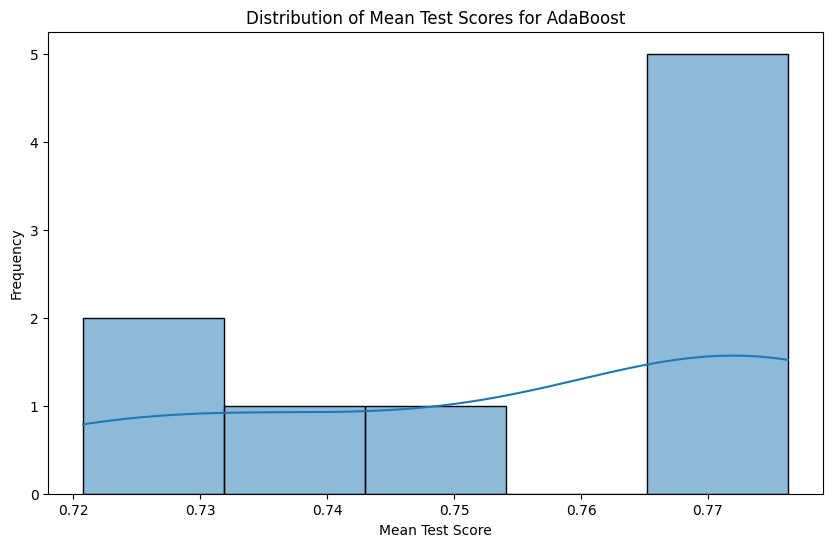

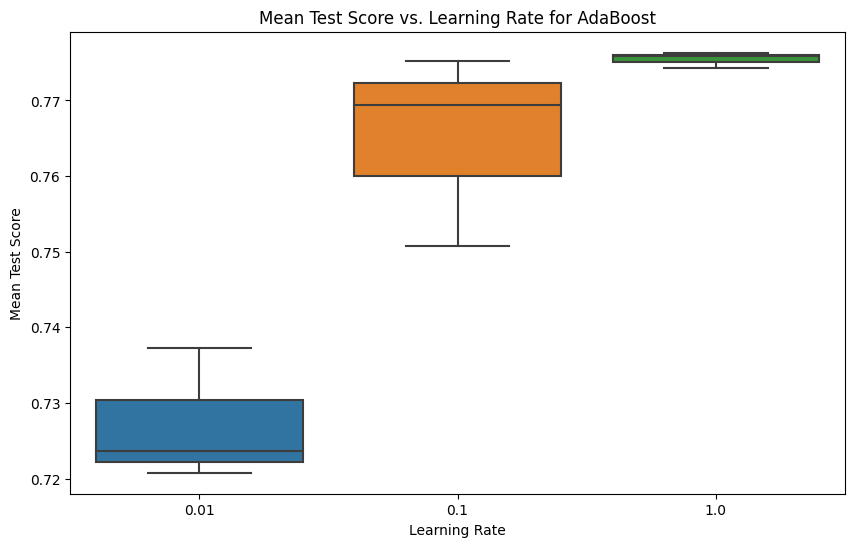

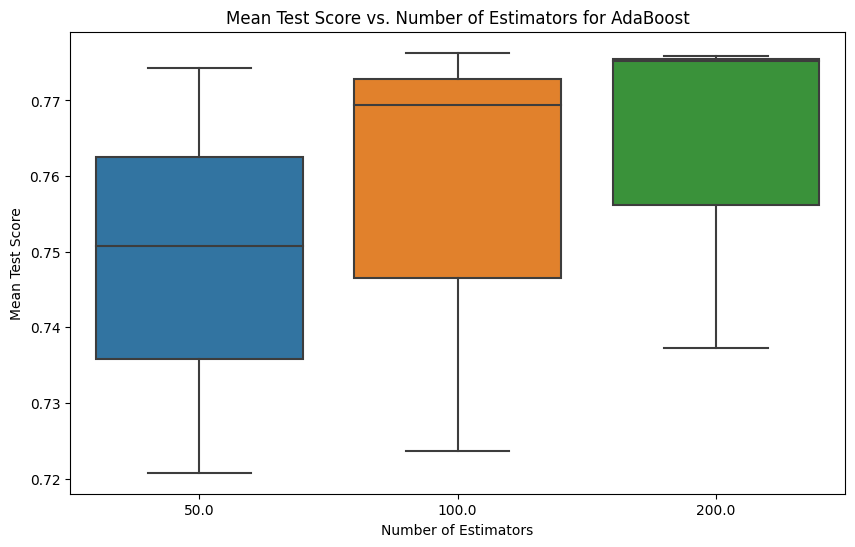

In [77]:
# ADA


file_path = '/kaggle/working/submission_ada_Final.csv'
data_ada = pd.read_csv(file_path)


data_ada['params'] = data_ada['params'].apply(ast.literal_eval)

data_ada = pd.concat([data_ada.drop(['params'], axis=1), data_ada['params'].apply(pd.Series)], axis=1)

data_ada.rename(columns=lambda x: x.replace('model__', ''), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data_ada['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores for AdaBoost')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='learning_rate', y='mean_test_score', data=data_ada)
plt.title('Mean Test Score vs. Learning Rate for AdaBoost')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='n_estimators', y='mean_test_score', data=data_ada)
plt.title('Mean Test Score vs. Number of Estimators for AdaBoost')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()


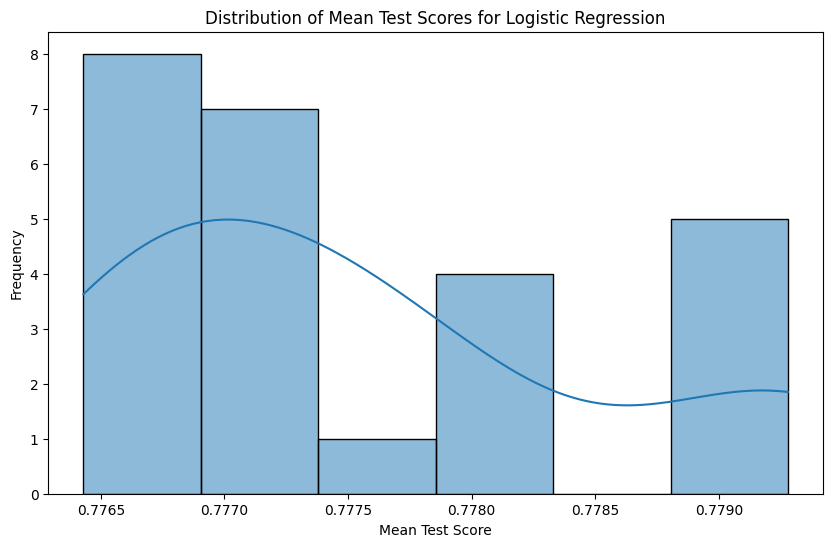

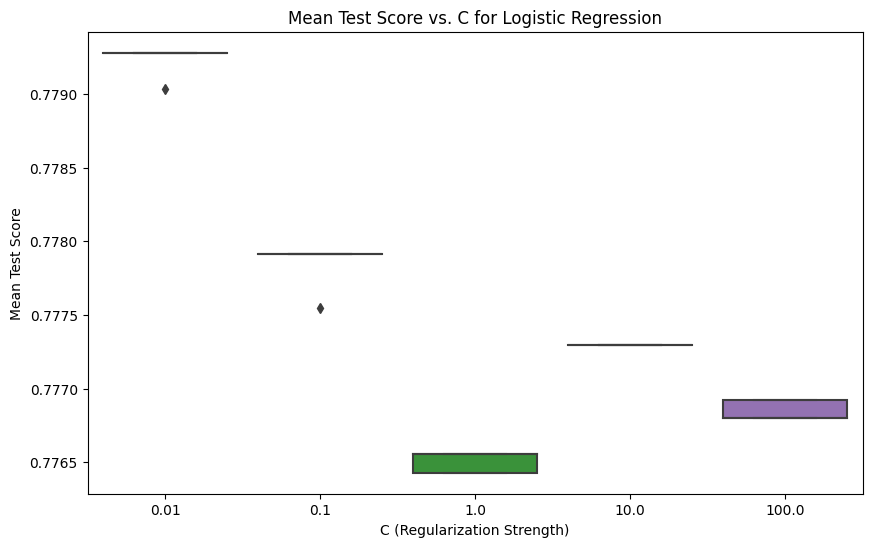

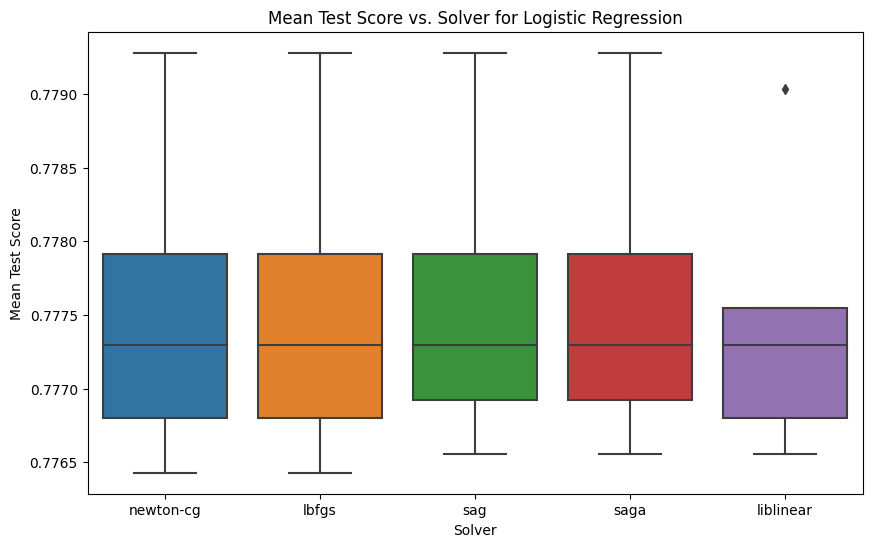

In [78]:
# Logestic Reg

file_path = '/kaggle/working/submission_log_reg_Final.csv' 
data_log_reg = pd.read_csv(file_path)


data_log_reg['params'] = data_log_reg['params'].apply(ast.literal_eval)

data_log_reg = pd.concat([data_log_reg.drop(['params'], axis=1), data_log_reg['params'].apply(pd.Series)], axis=1)

data_log_reg.rename(columns=lambda x: x.replace('model__', ''), inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data_log_reg['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores for Logistic Regression')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='C', y='mean_test_score', data=data_log_reg)
plt.title('Mean Test Score vs. C for Logistic Regression')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Mean Test Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='solver', y='mean_test_score', data=data_log_reg)
plt.title('Mean Test Score vs. Solver for Logistic Regression')
plt.xlabel('Solver')
plt.ylabel('Mean Test Score')
plt.show()



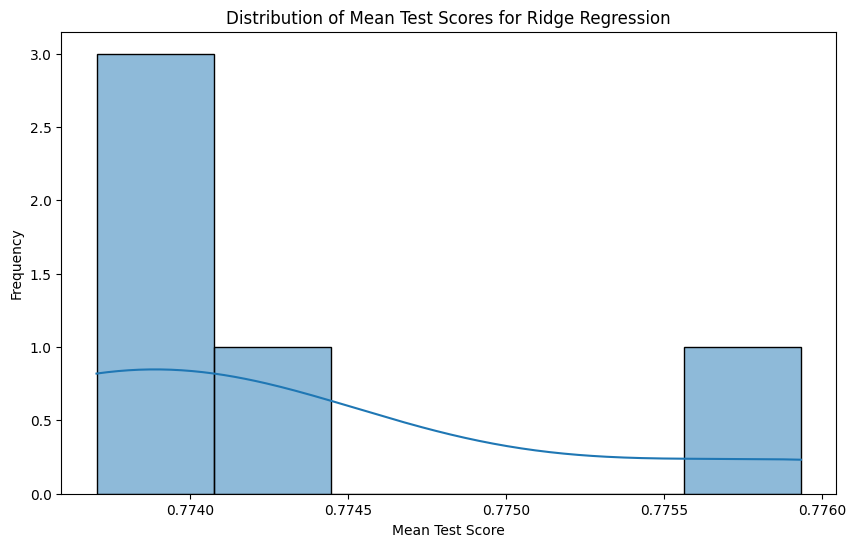

In [79]:
# Ridge 

file_path = '/kaggle/working/submission_ridge_final.csv' 
data_ridge = pd.read_csv(file_path)

data_ridge['params'] = data_ridge['params'].apply(ast.literal_eval)

data_ridge = pd.concat([data_ridge.drop(['params'], axis=1), data_ridge['params'].apply(pd.Series)], axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data_ridge['mean_test_score'], kde=True)
plt.title('Distribution of Mean Test Scores for Ridge Regression')
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.show()
